# 1 Dimentional Unsteady Diffusion Equation
The famous diffusion equation, also known as the heat equation, reads

$\frac{\partial u}{\partial t} = \alpha \cdot \frac{\partial^2 u}{\partial x^2} $,

where $u(x,t)$ is the unknown function to be solved for, $x$ is a coordinate in space, and $t$ is time. The coefficient $\alpha$ is the diffusion coefficient and determines how fast $u$ changes in time. A quick short form for the diffusion equation is $u_t=α\cdot u_{xx}$.

Compared to the wave equation, $u_{tt}=2 c\cdot  u_{xx}$, which looks very similar, but the diffusion equation features solutions that are very different from those of the wave equation. Also, the diffusion equation makes quite different demands to the numerical methods.

Typical diffusion problems may experience rapid change in the very beginning, but then the evolution of u becomes slower and slower. The solution is usually very smooth, and after some time, one cannot recognize the initial shape of u. This is in sharp contrast to solutions of the wave equation where the initial shape is preserved - the solution is basically a moving initial condition. The standard wave equation utt=c2uxx has solutions that propagates with speed c forever, without changing shape, while the diffusion equation converges to a stationary solution $u(x)$ as $t→∞$. In this limit, ut=0, and u¯ is governed by u¯′′(x)=0. This stationary limit of the diffusion equation is called the Laplace equation and arises in a very wide range of applications throughout the sciences.

It is possible to solve for u(x,t) using a explicit scheme. And of more importance, since the solution u of the diffusion equation is very smooth and changes slowly, small time steps are not convenient and not required by accuracy as the diffusion process converges to a stationary state.

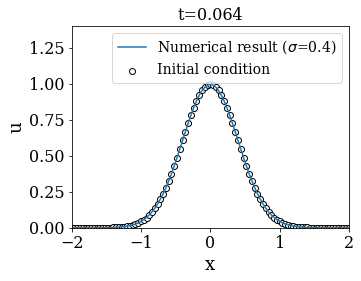

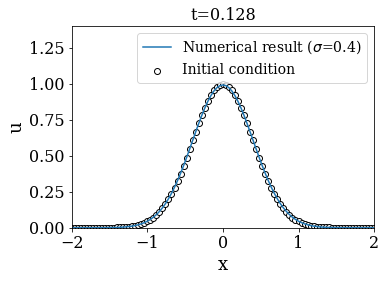

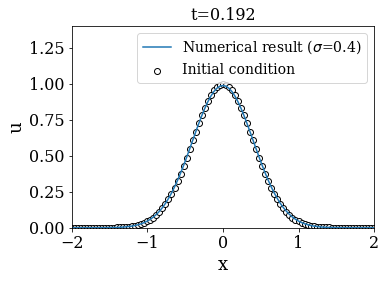

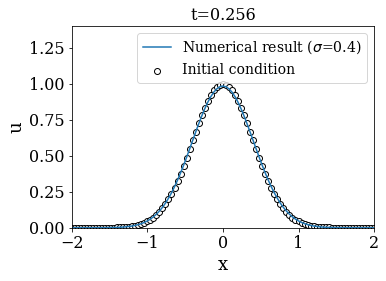

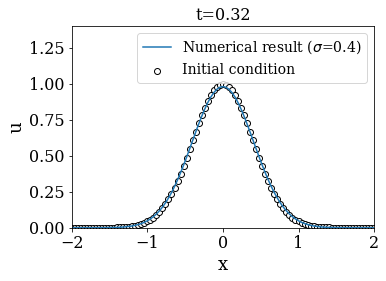

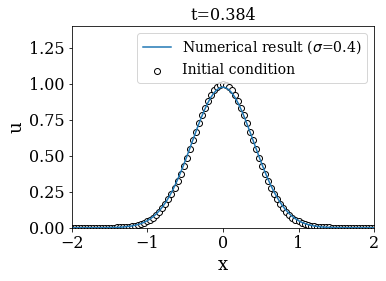

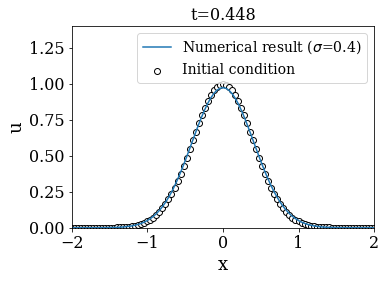

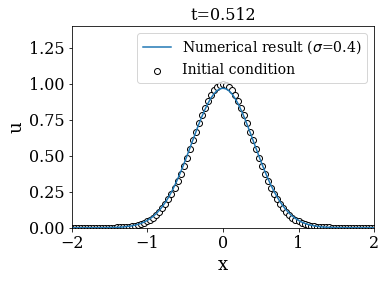

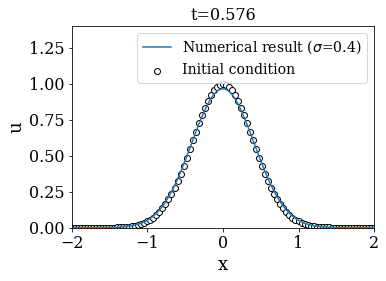

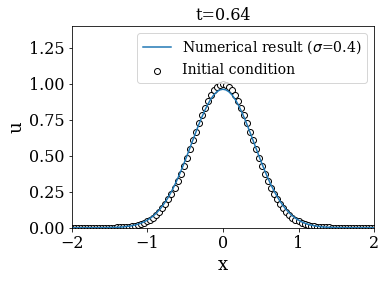

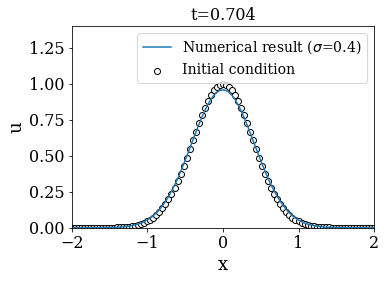

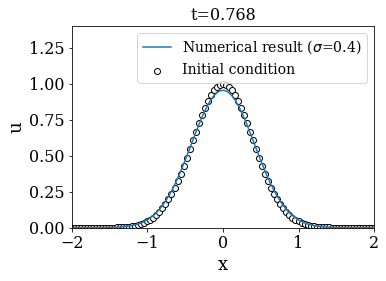

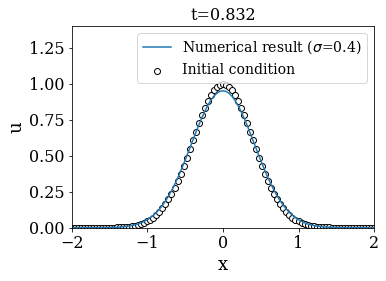

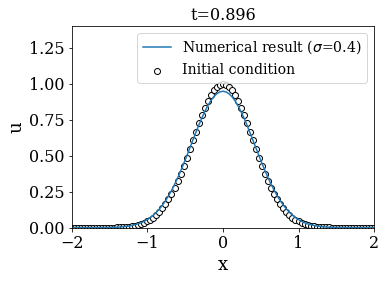

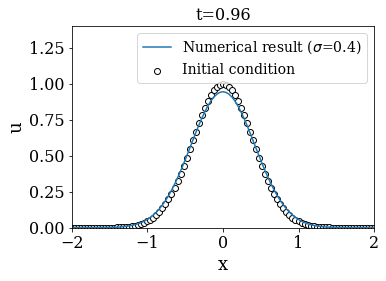

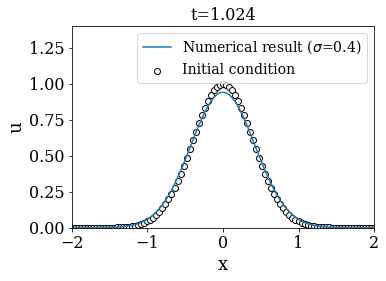

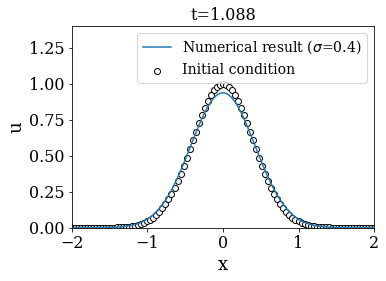

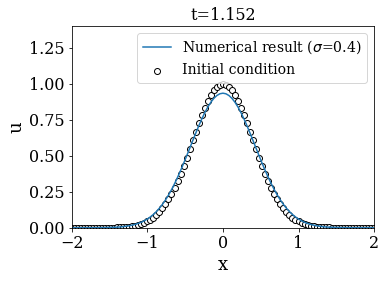

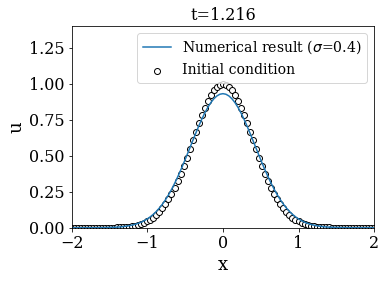

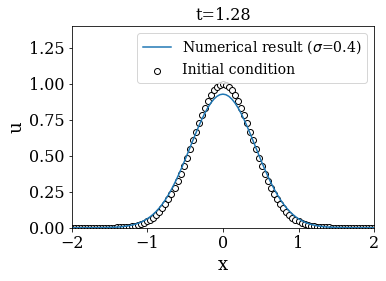

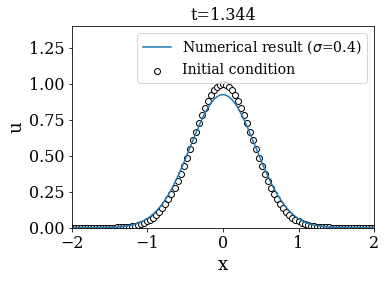

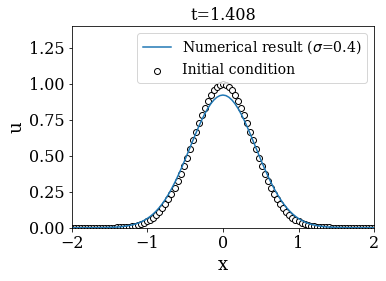

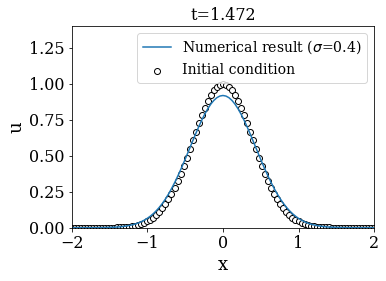

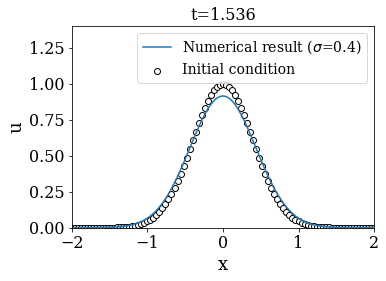

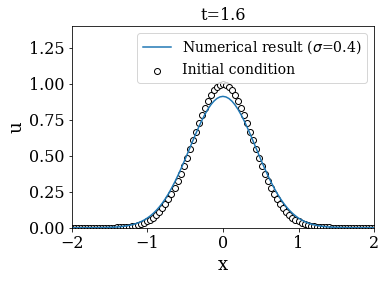

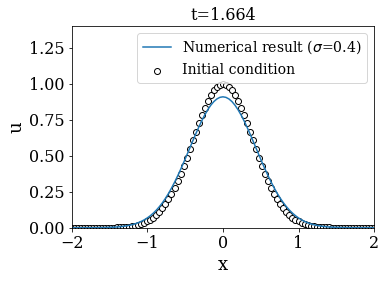

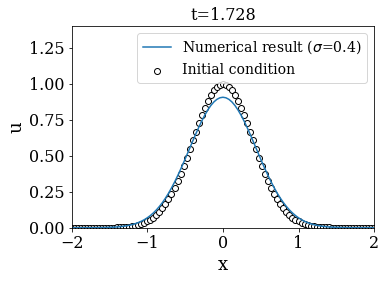

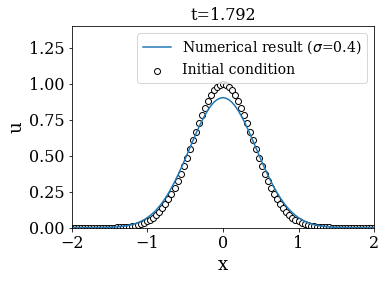

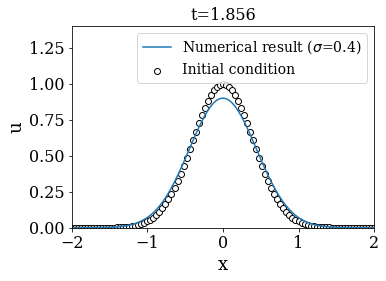

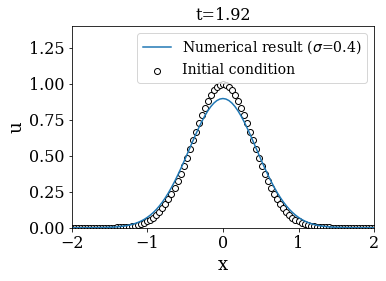

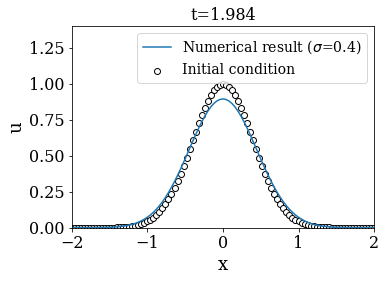

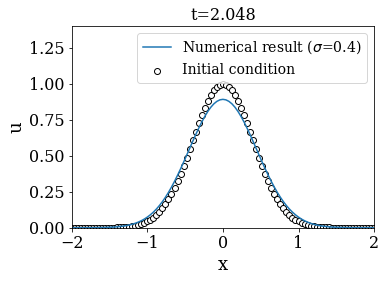

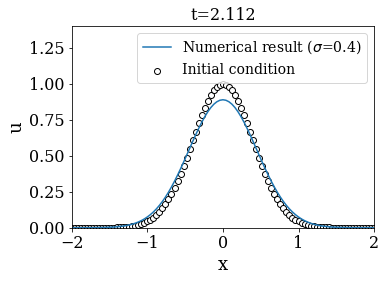

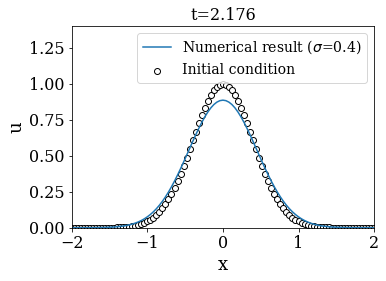

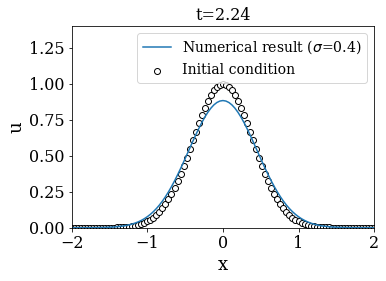

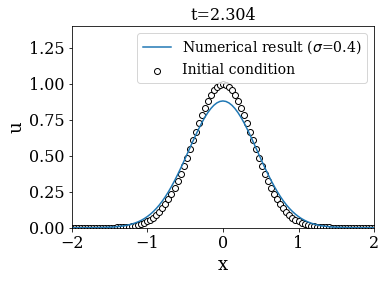

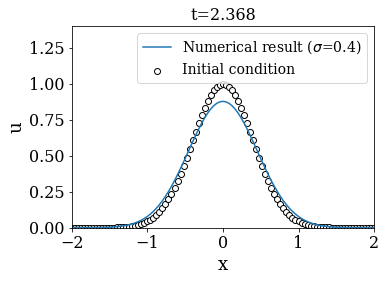

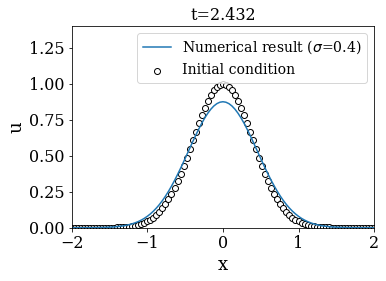

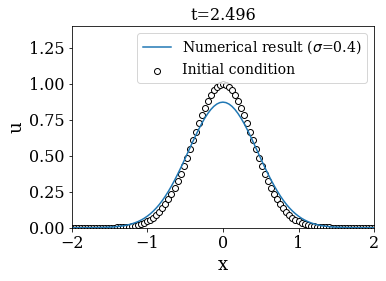

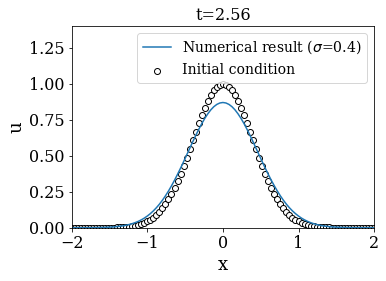

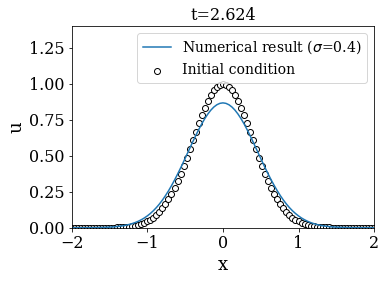

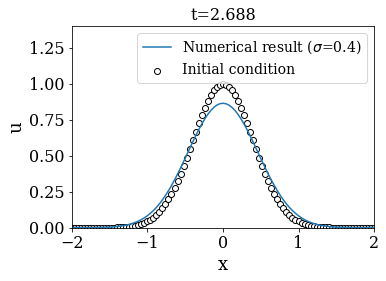

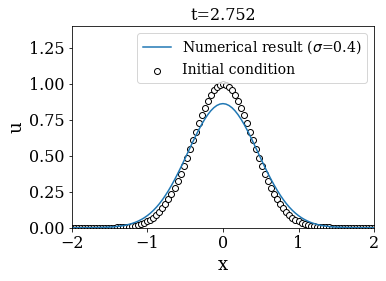

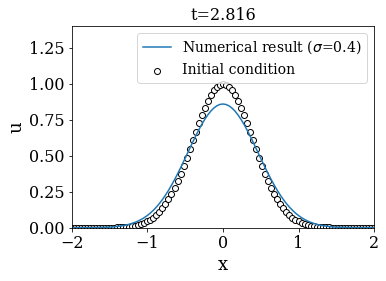

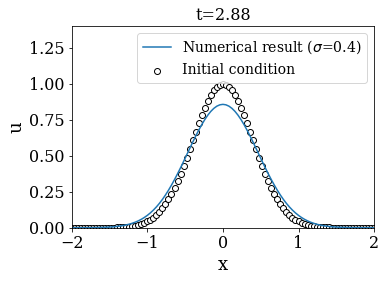

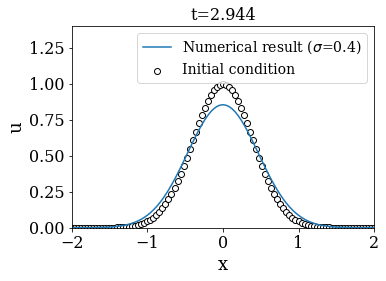

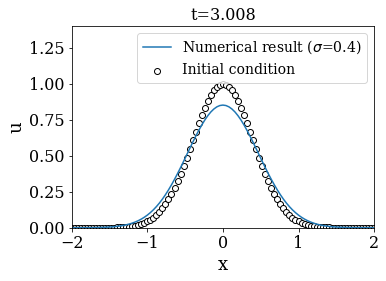

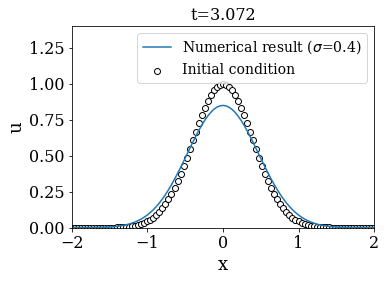

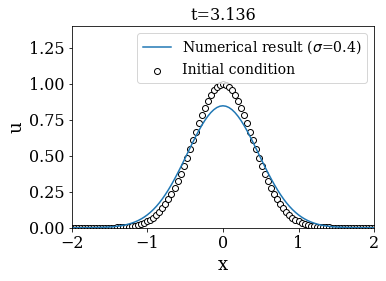

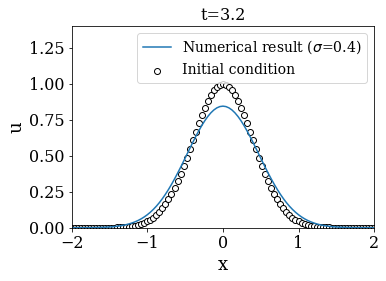

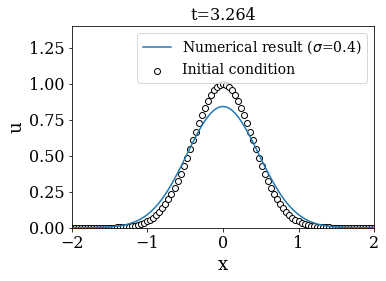

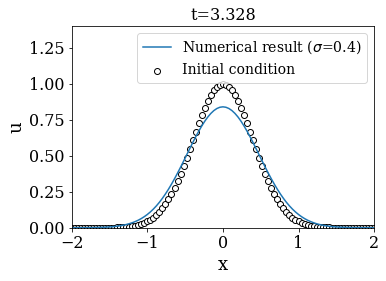

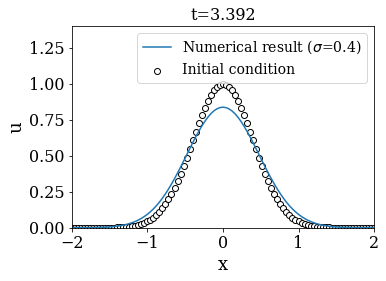

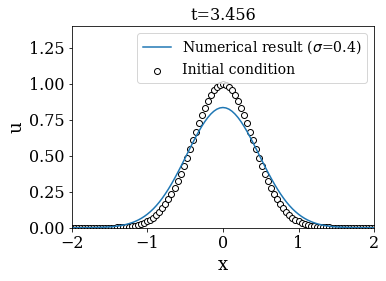

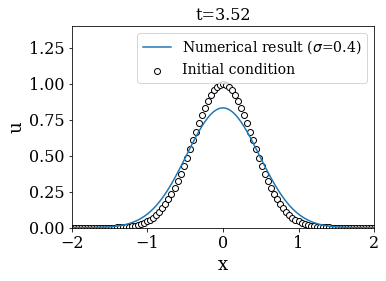

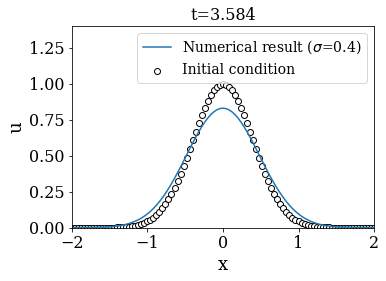

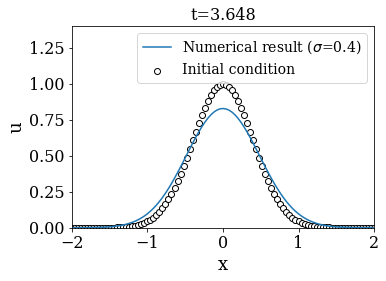

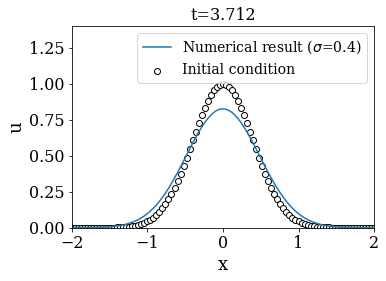

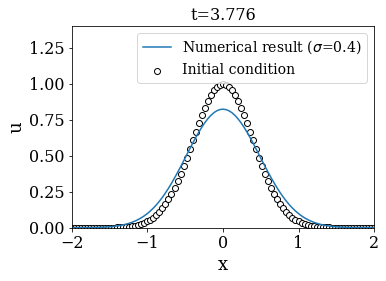

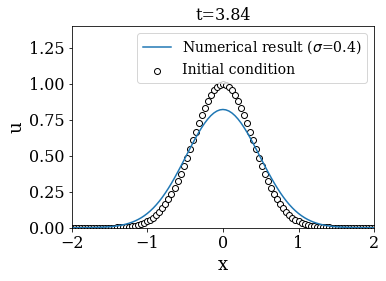

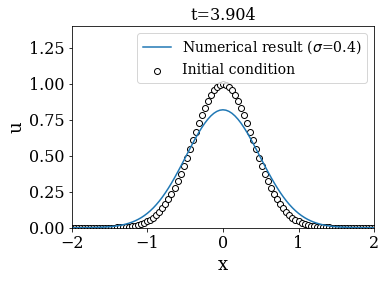

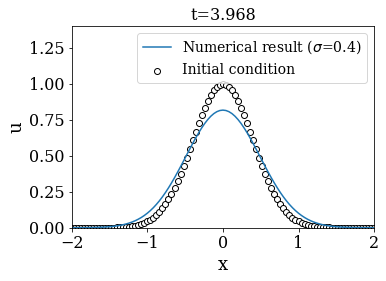

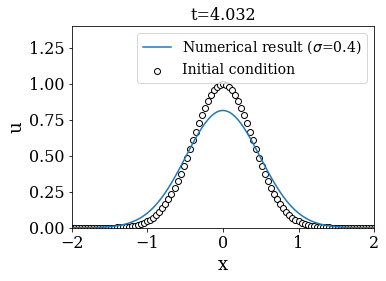

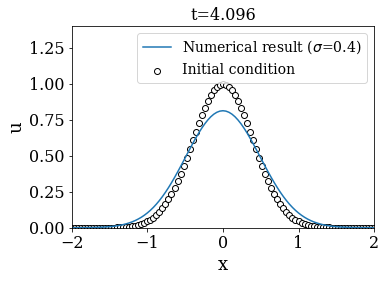

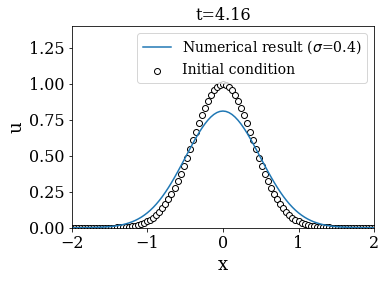

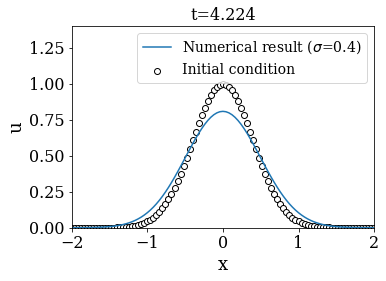

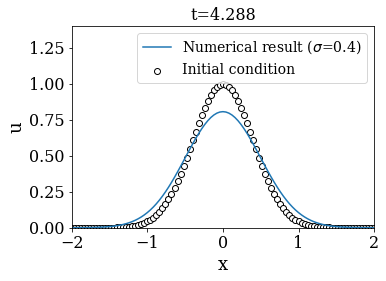

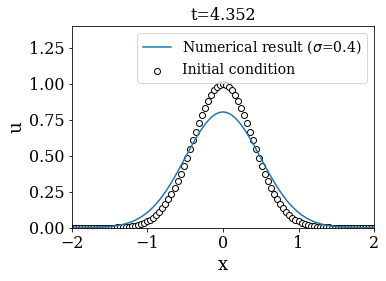

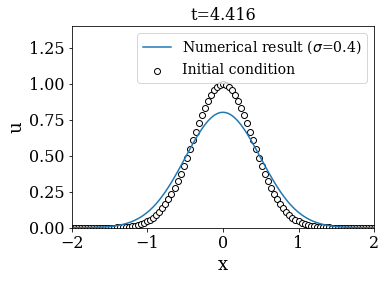

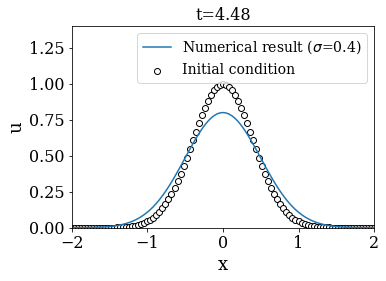

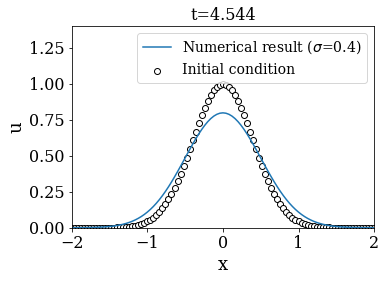

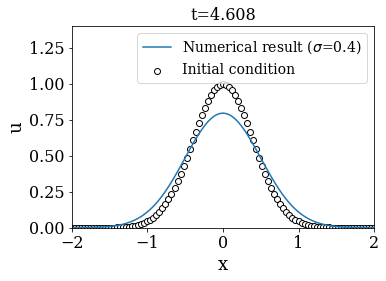

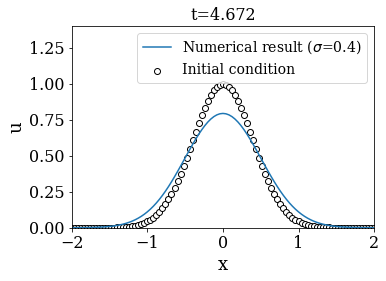

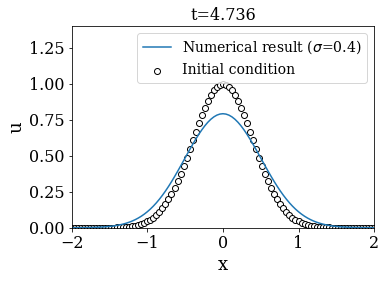

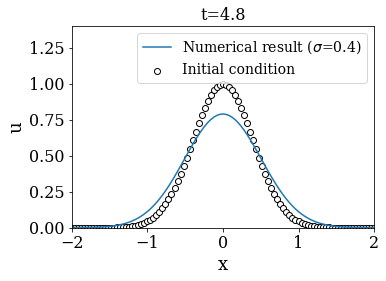

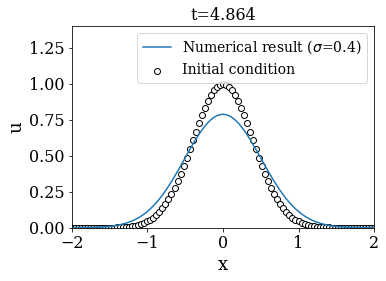

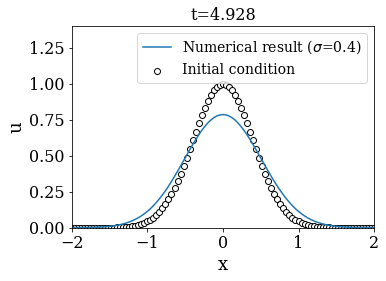

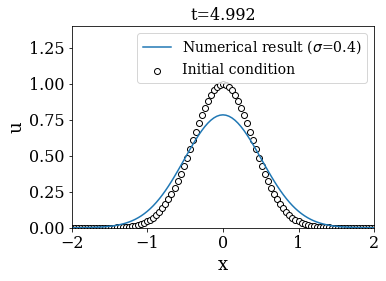

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rc
rc('font', family='serif')
rc('lines', linewidth=1.5)
rc('font', size=16)
plt.rc('legend',**{'fontsize':14})

#===============================================================
# Define parameters
#===============================================================

alpha = 0.01                      # Diffusivity
sigma = 0.4                       # Stability condition
Nx = 101;                         # Number of grid points
xmax = 2.;                        # Domain limit to the right
xmin = -2.;                       # Domain limit to the left
dx = (xmax-xmin)/(Nx-1)           # Mesh size
x = np.linspace(xmin,xmax,Nx)     # Discretized mesh
dt = sigma*dx**2/alpha            # Time step
t_end = 5.                        # Final time
Nt = int(t_end/dt)                # Number of iterations
t = np.linspace(0.,t_end,Nt+1)    # Time vector
U = np.zeros((Nt+1,Nx))           # u^n_i
U[0,:] = np.exp(-0.5*(x/0.4)**2)  # Initial solution


#===============================================================
# Temporal loop
#===============================================================

Fequency = 10; # HOW OFTEN you want to SHOW plots On screen, More often means more run time. 
for n in range (0,Nt, Fequency ):
  
  sigma = alpha*dt/(dx*dx)
  
  for i in range (1,Nx-1):
      U[n+1,i] = U[n,i] + sigma*(U[n,i+1]-2*U[n,i]+U[n,i-1]); # Interior points
  U[n+1,0] = 0;                                               # BC left
  U[n+1,-1] = 0;                                              # BC right
  
  # Plot solution
  if (n==0): fig, ax = plt.subplots(figsize=(5.5,4))
  plt.clf()
  plt.plot(x,U[n+1,:])
  plt.scatter(x,U[0,:], marker='o', facecolors='white', color='k')
  plt.gca().legend(('Numerical result ($\sigma$='+str(sigma)+')','Initial condition'))
  plt.axis([xmin, xmax, 0, 1.4])
  plt.title('t='+str(round(dt*(n+1),3)),fontsize=16)
  plt.xlabel('x',fontsize=18)
  plt.ylabel('u',fontsize=18)
  plt.subplots_adjust(left=0.2)
  plt.subplots_adjust(bottom=0.18)
  plt.draw()
  plt.pause(0.001)

plt.show()
fig.savefig("Advection-figure.pdf", dpi=300)


# 1 Dimentional Unsteady Diffusion Equation
The advection-diffusion equation describes physical phenomena where particles, energy, or other physical quantities are transferred inside a physical system due to two processes: diffusion and advection. Advection is a transport mechanism of a substance or conserved property by a fluid due to the fluid’s bulk motion. Diffusion is the net movement of molecules or atoms from a region of high concentration to a region of low concentration. The advection-diffusion equation is a relatively simple equation describing flows, or alternatively, describing a stochastically-changing system

The general form of advection diffusion equation is given as follows:

$\frac{\partial u}{\partial t} = \alpha \frac{\partial^2 u}{\partial x^2} + c \cdot \frac{\partial u}{\partial x} + f $

where $\alpha$ is diffusion coeffceint 
$C$ is advection speed
f is source of generation and dissipation.


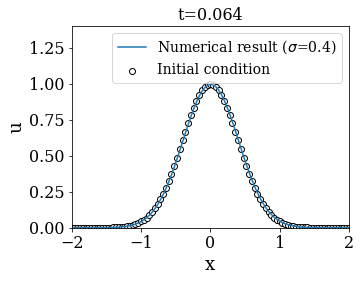

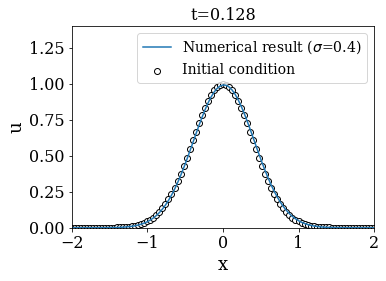

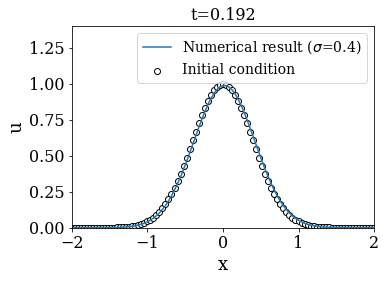

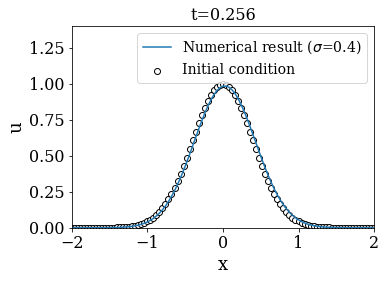

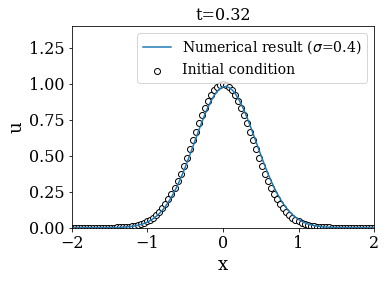

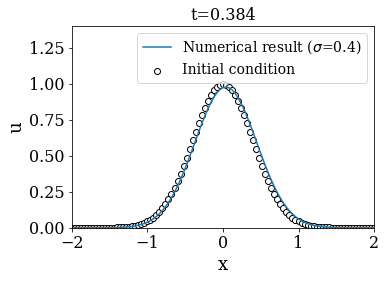

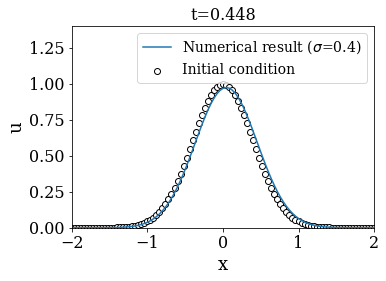

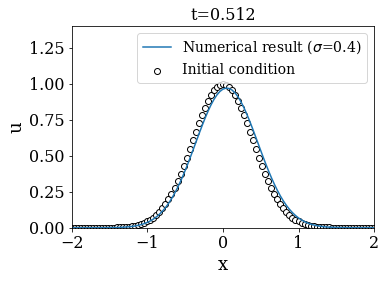

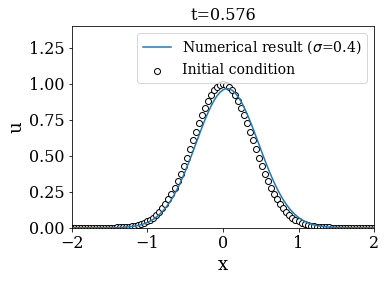

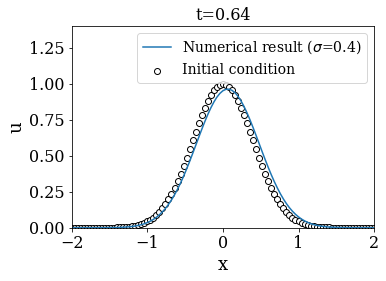

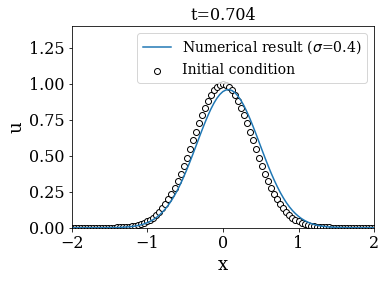

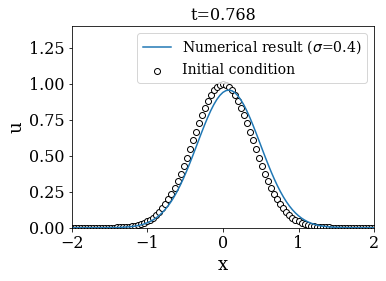

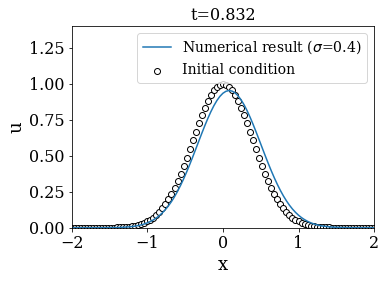

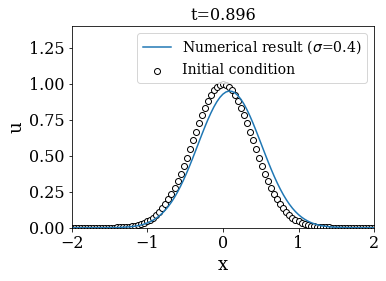

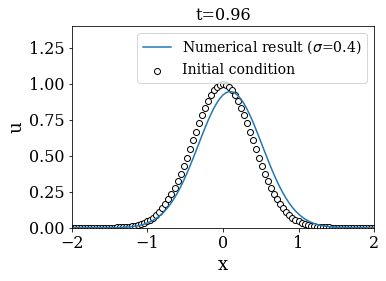

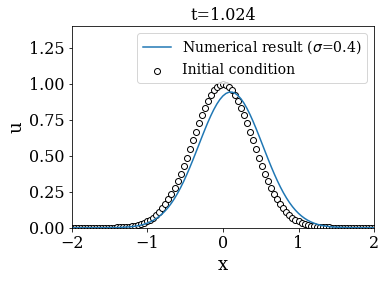

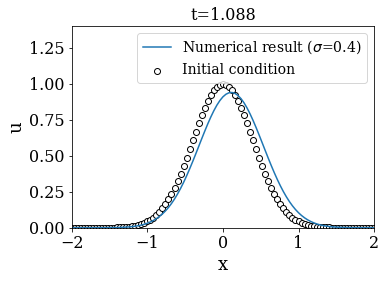

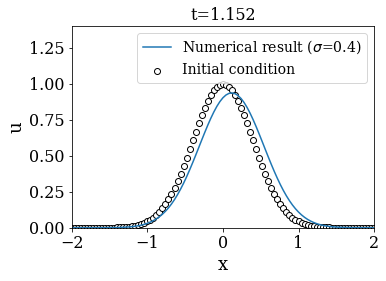

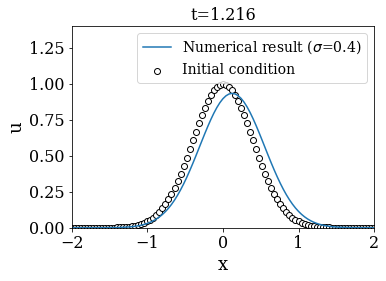

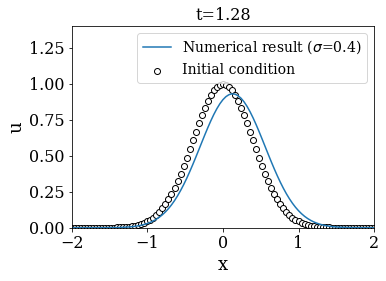

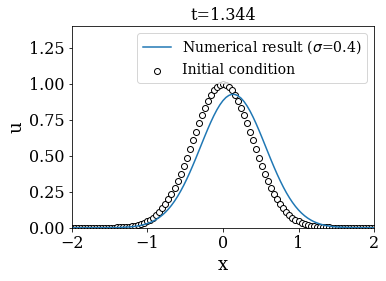

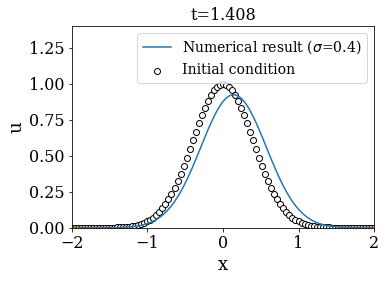

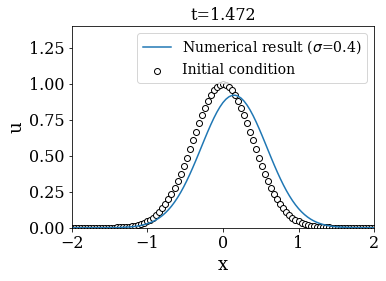

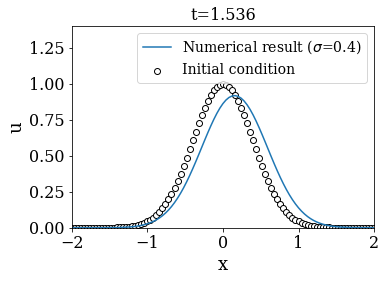

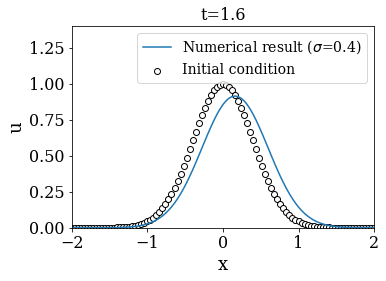

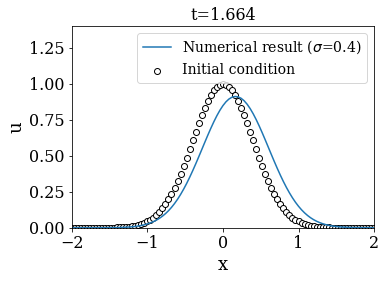

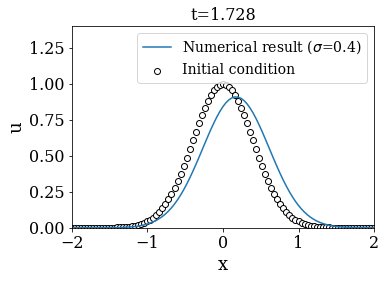

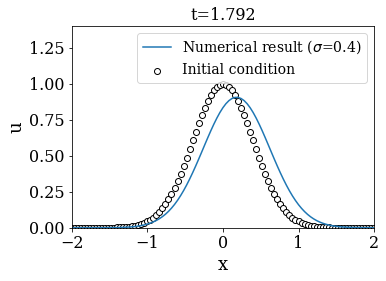

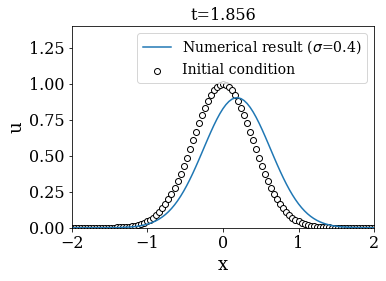

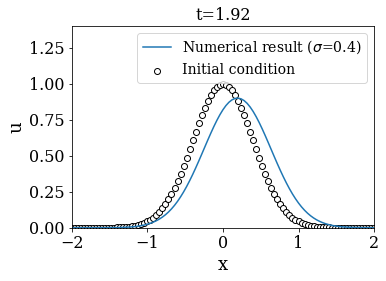

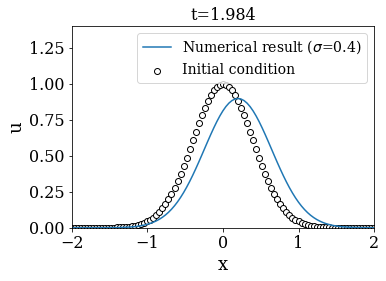

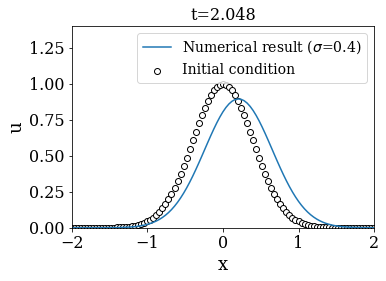

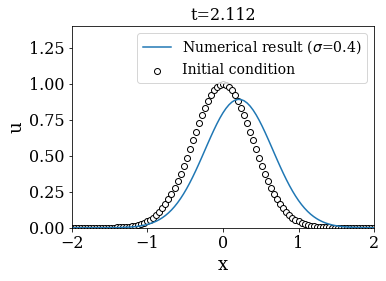

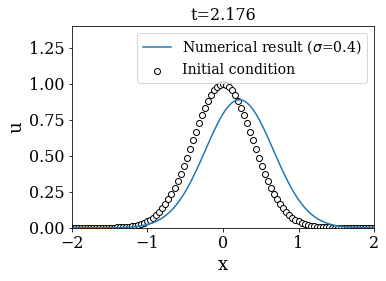

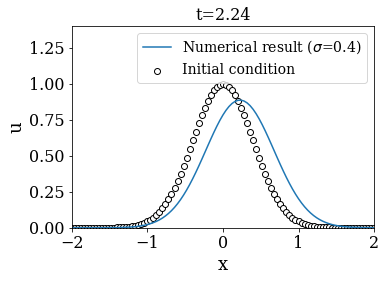

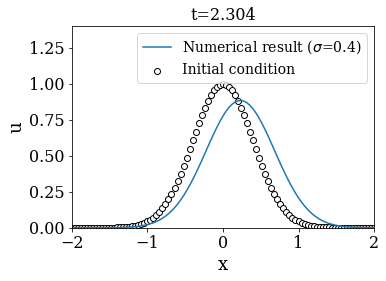

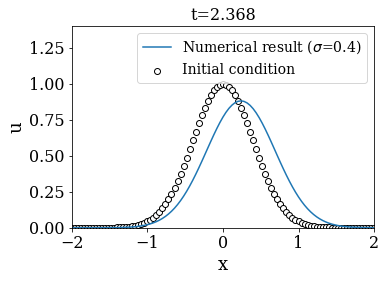

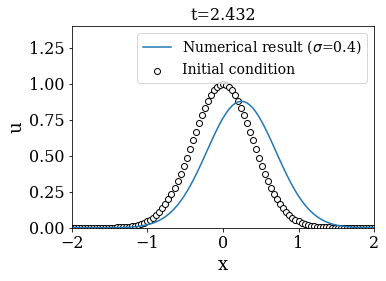

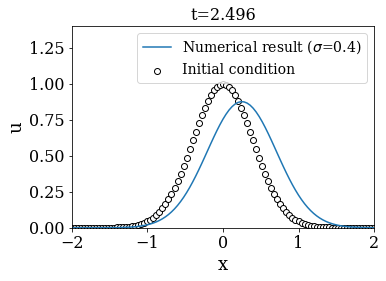

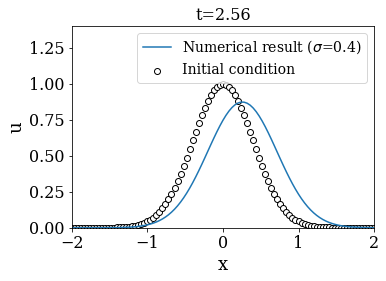

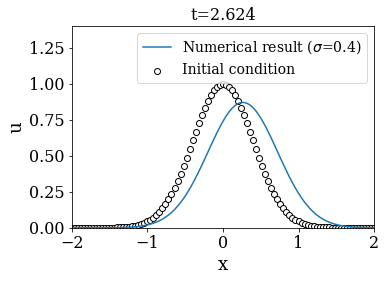

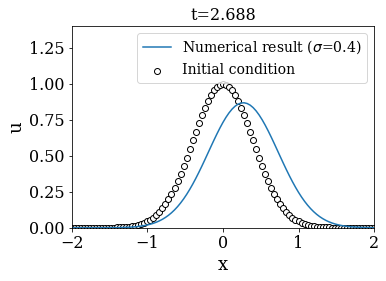

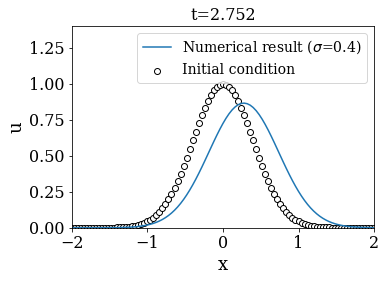

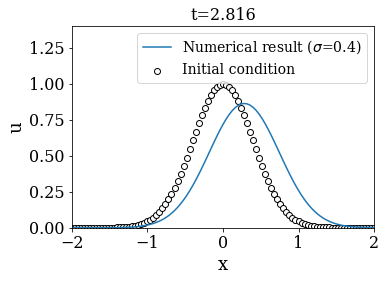

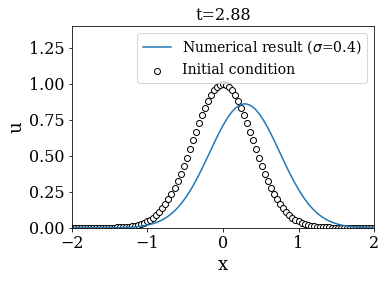

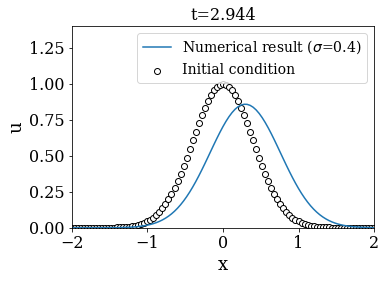

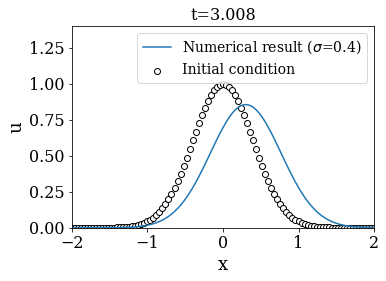

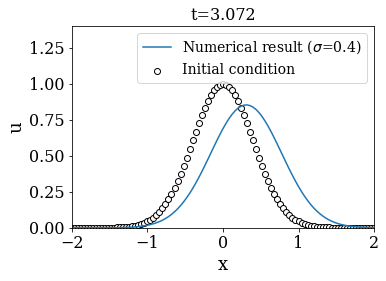

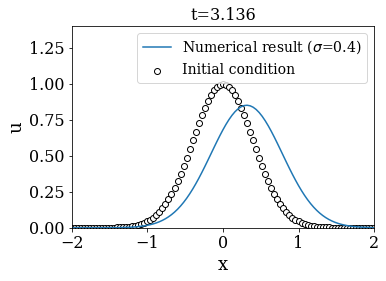

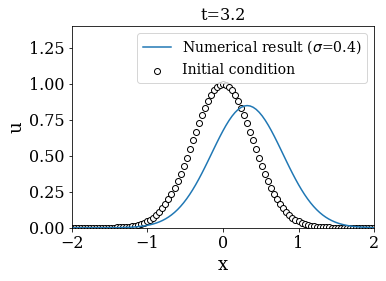

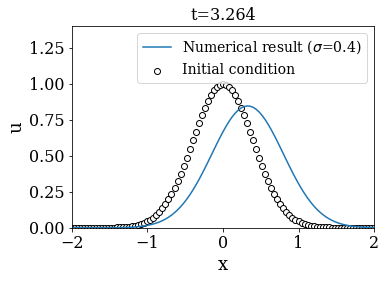

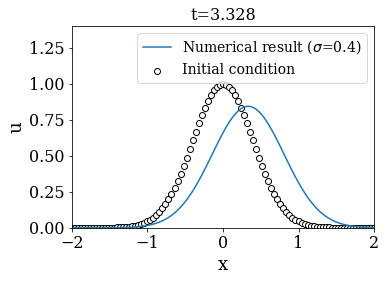

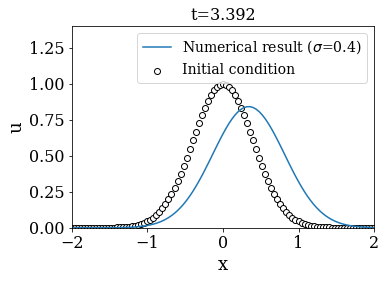

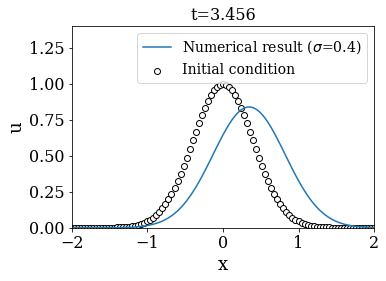

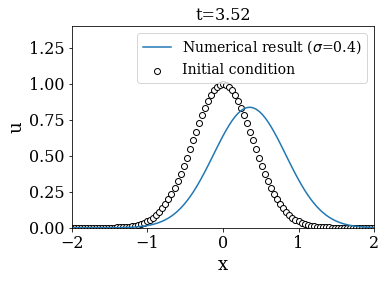

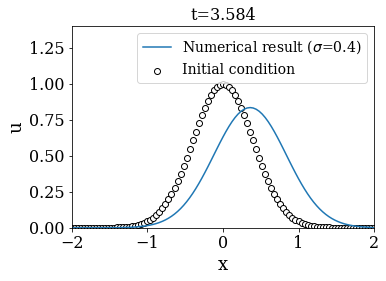

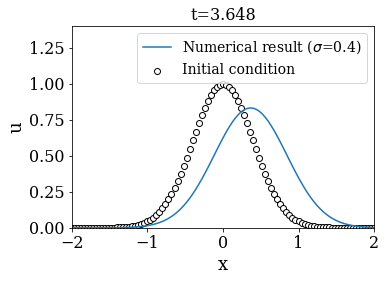

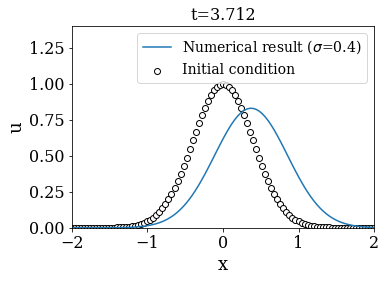

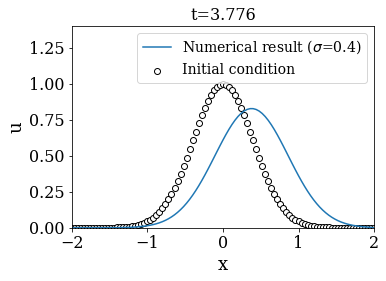

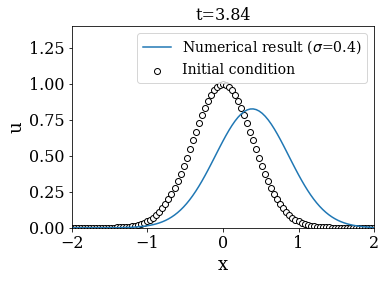

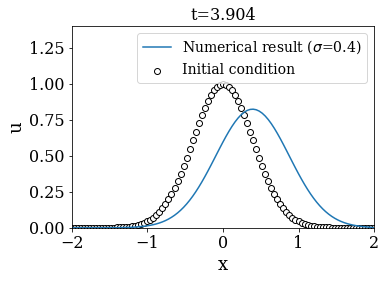

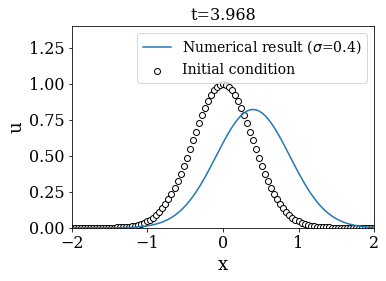

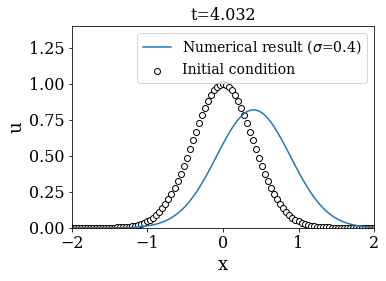

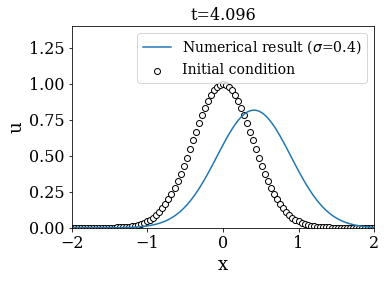

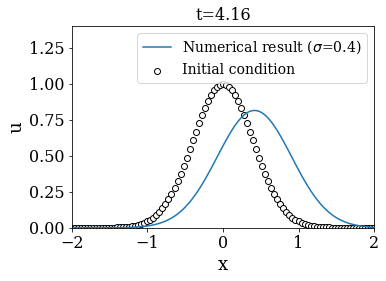

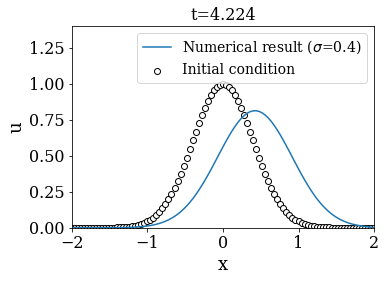

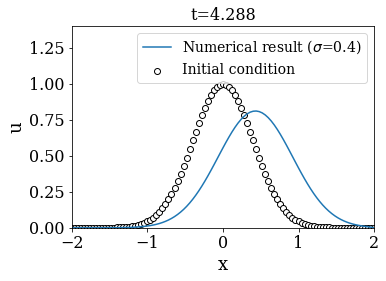

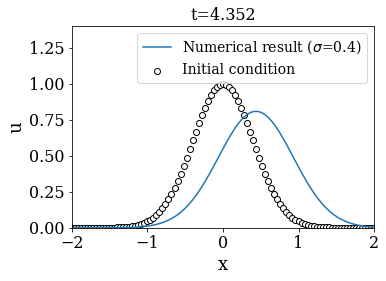

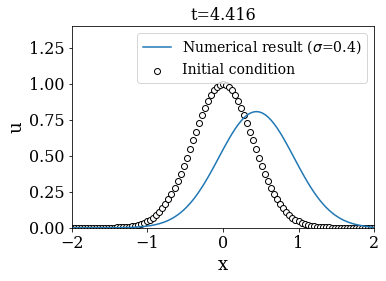

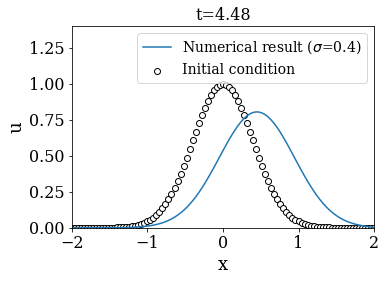

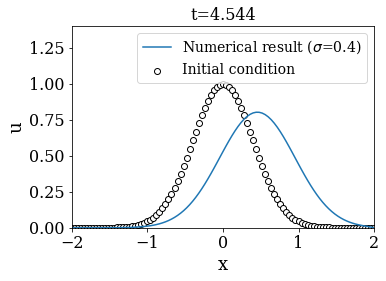

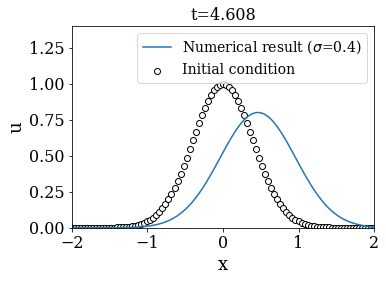

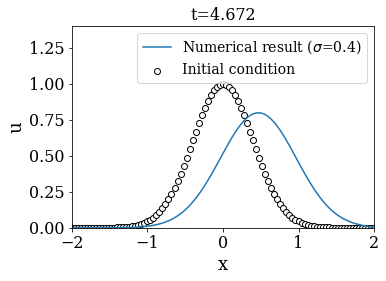

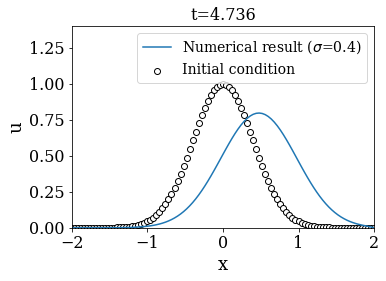

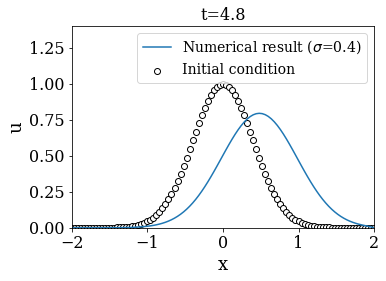

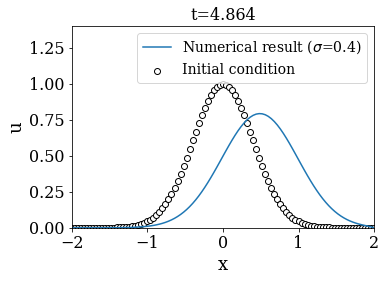

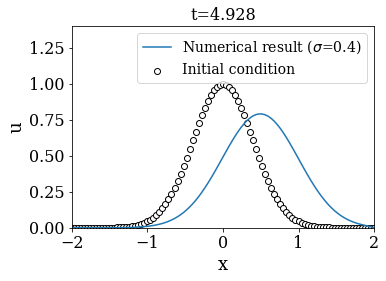

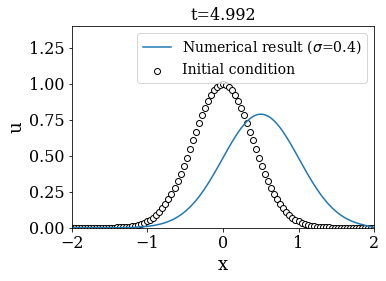

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rc
rc('font', family='serif')
rc('lines', linewidth=1.5)
rc('font', size=16)
plt.rc('legend',**{'fontsize':14})

#===============================================================
# Define parameters
#===============================================================

alpha = 0.01                      # Diffusivity
sigma = 0.4                       # Stability condition
Nx = 101;                         # Number of grid points
xmax = 2.;                        # Domain limit to the right
xmin = -2.;                       # Domain limit to the left
dx = (xmax-xmin)/(Nx-1)           # Mesh size
x = np.linspace(xmin,xmax,Nx)     # Discretized mesh
dt = sigma*dx**2/alpha            # Time step
t_end = 5.                        # Final time
Nt = int(t_end/dt)                # Number of iterations
t = np.linspace(0.,t_end,Nt+1)    # Time vector
U = np.zeros((Nt+1,Nx))           # u^n_i
U[0,:] = np.exp(-0.5*(x/0.4)**2)  # Initial solution
C = 0.1;
CFL =  C*dt/dx                     
#===============================================================
# Temporal loop
#===============================================================

Fequency = 10; # HOW OFTEN you want to SHOW plots On screen, More often means more run time.
for n in range (0,Nt, Frequency):
  
    sigma = alpha*dt/(dx*dx)

    for i in range (1,Nx-1):
      U[n+1,i] = U[n,i] + sigma*(U[n,i+1]-2*U[n,i]+U[n,i-1])  - 0.5*CFL*(U[n,i+1]-U[n, i-1]); # Interior points

    U[n+1, Nx-1] = U[n+1, 0];

    # Plot solution
    if (n==0): fig, ax = plt.subplots(figsize=(5.5,4))
    plt.clf()
    plt.plot(x,U[n+1,:])
    plt.scatter(x,U[0,:], marker='o', facecolors='white', color='k')
    plt.gca().legend(('Numerical result ($\sigma$='+str(sigma)+')','Initial condition'))
    plt.axis([xmin, xmax, 0, 1.4])
    plt.title('t='+str(round(dt*(n+1),3)),fontsize=16)
    plt.xlabel('x',fontsize=18)
    plt.ylabel('u',fontsize=18)
    plt.subplots_adjust(left=0.2)
    plt.subplots_adjust(bottom=0.18)
    plt.draw()
    plt.pause(0.001)

plt.show()
fig.savefig("Adve-diffu-figure.pdf", dpi=300)


# Tasks
1. Run the 1D diffusion solver for a range of diffusion coeffient and explain the effects of diffusion coeffcient on results. 
2. Run the 1D advection diffusion for a range of advection speed and explain the CFL condition nessary for stable solution.
3. Run the 1D advection diffusion for a range of diffusion coeffient and explain the effects of diffusion coeffcient on the resutls. 

In [ ]:
import 